In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import matplotlib

In [2]:
coloree=list(matplotlib.colors.cnames.keys())
hatchee=['','/', '|', '-', '+', 'x', 'o', 'O', '.', '*']
linestylee=['solid', 'dashed', 'dashdot', 'dotted']
barwidthee=[i for i in range(10)]
#Diagramme en kiviat
#diagramme_kiviat(skills,prcntg,colorxaxis,coloryaxis,linestyle,edgecolor)
#Set default:
coloryaxis='blue'
colorxaxis='blue'
linestyle='solid'
edgecolor='blue'
#Diagramme en baton
#diagramme_baton(skills2,note,hatch1,hatch2,colorlinewidth,colorbarfilled,colorline,colorlinenonefilled,linestyle,barwidth)
#Set default:
colorlinewidth='blue'
colorbarfilled='green'
colorline='black'
colorlinenonefilled='white'
hatch1=''
hatch2='-'
linestyle='solid'
barwidth=1

-----------------------Extraction des flagstats----------------------------------------------

In [162]:

dicte_of_mapped={}
for i in os.listdir():
    if i[:4]=="flag":
        flags=pd.read_csv(i)
        dicte_of_mapped[i[-6:-4]]=re.findall('\d\d.\d*%', flags.loc[3][0])[0]
dicte_of_mapped

{'66': '92.95%',
 '88': '94.67%',
 '52': '95.47%',
 '53': '94.08%',
 '54': '95.03%',
 '67': '97.33%',
 '68': '96.27%',
 '69': '96.59%',
 '70': '50.03%',
 '71': '89.79%',
 '72': '72.91%',
 '73': '95.72%',
 '74': '96.61%',
 '75': '68.05%',
 '76': '61.18%',
 '77': '94.65%',
 '78': '94.26%',
 '79': '93.51%',
 '80': '64.24%',
 '81': '98.28%',
 '82': '97.02%',
 '83': '94.50%',
 '84': '95.26%',
 '85': '64.94%',
 '86': '96.59%',
 '87': '98.71%'}

In [81]:
dicte_mapped_diagr={}
dicte_mapped_diagr["moins de 40%"]=len([i for i,j in dicte_of_mapped.items() if int(j[0]+j[1])<=40 ])
dicte_mapped_diagr["Entre 40%-60%"]=len([i for i,j in dicte_of_mapped.items() if (40<=int(j[0]+j[1])<=60) ])
dicte_mapped_diagr["Entre 60%-80%"]=len([i for i,j in dicte_of_mapped.items() if (60<=int(j[0]+j[1])<=80) ])
dicte_mapped_diagr["Entre 80%-100%"]=len([i for i,j in dicte_of_mapped.items() if (80<=int(j[0]+j[1])<=100) ])
dicte_mapped_diagr

{'moins de 40%': 0,
 'Entre 40%-60%': 1,
 'Entre 60%-80%': 5,
 'Entre 80%-100%': 20}

In [160]:
a=list(dicte_mapped_diagr.keys())
b=list(dicte_mapped_diagr.values())
def diagramme_circulaire(prcntg,nbr_sample):  
    explode=(0,)*(len(prcntg))
    plt.pie(nbr_sample, explode=explode, labels=prcntg,autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*26), startangle=20, shadow=True,)
   # plt.axis('equal')
    return plt.show()
def run_circulaire(a,b):
    diagramme_circulaire(a,b)

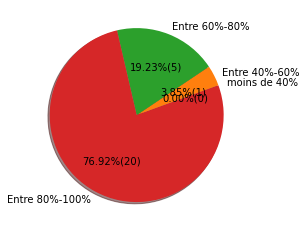

In [161]:
run_circulaire(a,b)

In [11]:
dicte_of_mapped = sorted(dicte_of_mapped.items(), key=lambda x: x[1], reverse=False)
dicte_of_mapped

[('70', '50.03%'),
 ('76', '61.18%'),
 ('80', '64.24%'),
 ('85', '64.94%'),
 ('75', '68.05%'),
 ('72', '72.91%'),
 ('71', '89.79%'),
 ('66', '92.95%'),
 ('79', '93.51%'),
 ('53', '94.08%'),
 ('78', '94.26%'),
 ('83', '94.50%'),
 ('77', '94.65%'),
 ('88', '94.67%'),
 ('54', '95.03%'),
 ('84', '95.26%'),
 ('52', '95.47%'),
 ('73', '95.72%'),
 ('68', '96.27%'),
 ('69', '96.59%'),
 ('86', '96.59%'),
 ('74', '96.61%'),
 ('82', '97.02%'),
 ('67', '97.33%'),
 ('81', '98.28%'),
 ('87', '98.71%')]

n_reads are the total number of reads

n_pair_all : the read is paired in sequencing, no matter whether it is mapped in a pair

n_pair_good : the read is mapped in a proper pair

n_read1 : count read1

n_read2 : count read2

n_sgltn : the read itself is unmapped the mate is mapped

n_pair_map: the read itself is mapped the mate is unmapped

n_diffchr: number of reads with a mate mapped on a different chromosome

n_diffhigh: number of reads with a mate on a different chromosome having a quality greater than 5
